ML ASSIGNMENT: IMAGE CLASSIFICATION USING CNN

Importing the required libraries:

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

PREPROCESSING THE DATE:

Loading the data set & Splitting it into train and test data:

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

Reshaping the data:

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Normalising the images:

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Building a CNN model for classifying the images:

In [12]:
cnn = models.Sequential([layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                         layers.MaxPooling2D((2, 2)),
                         layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                         layers.MaxPooling2D((2, 2)),
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')])

In [13]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
cnn.fit(x_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 69s 42ms/step - loss: 1.4585 - accuracy: 0.4773
Epoch 2/30
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1062 - accuracy: 0.6094
Epoch 3/30
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9654 - accuracy: 0.6639
Epoch 4/30
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8747 - accuracy: 0.6968
Epoch 5/30
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7940 - accuracy: 0.7237
Epoch 6/30
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7330 - accuracy: 0.7450
Epoch 7/30
1563/1563 [==============================] - 78s 50ms/step - loss: 0.6744 - accuracy: 0.7676
Epoch 8/30
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6253 - accuracy: 0.7826
Epoch 9/30
1563/1563 [==============================] - 49s 32ms/step - loss: 0.5824 - accuracy: 0.7963
Epoch 10/30
1563/1563 [==============================] - 47s 30m

In [15]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 2.2245 - accuracy: 0.6733


[2.2245397567749023, 0.67330002784729]

In [16]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 4s 10ms/step


In [17]:
y_classes = [np.argmax(element) for element in y_pred]

Predicting the classes from the test set:

In [19]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

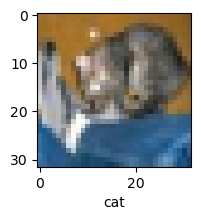

In [20]:
plot_sample(x_test, y_test,0)

In [21]:
classes[y_classes[0]]

'cat'

Prediction is CORRECT

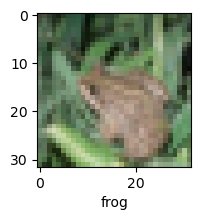

In [22]:
plot_sample(x_test, y_test,4)

In [23]:
classes[y_classes[4]]

'deer'

Prediction is WRONG

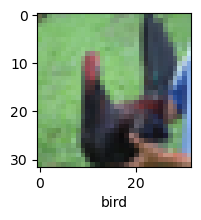

In [24]:
plot_sample(x_test, y_test,25)

In [25]:
classes[y_classes[25]]

'bird'

Prediction is WRONG

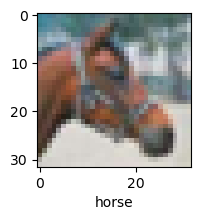

In [26]:
plot_sample(x_test, y_test,17)

In [27]:
classes[y_classes[17]]

'horse'

Prediction is CORRECT

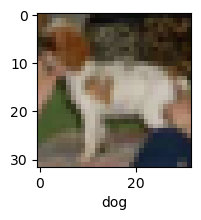

In [28]:
plot_sample(x_test, y_test,12)

In [29]:
classes[y_classes[12]]

'cat'

Prediction is WRONG